In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

In [2]:
import mitsuba as mi
import drjit as dr
from matplotlib import pyplot as plt
import numpy as np

print(mi.variants())
mi.set_variant("cuda_ad_spectral_polarized")

['scalar_rgb', 'scalar_spectral', 'scalar_spectral_polarized', 'llvm_ad_rgb', 'llvm_ad_mono', 'llvm_ad_mono_polarized', 'llvm_ad_spectral', 'llvm_ad_spectral_polarized', 'cuda_ad_rgb', 'cuda_ad_mono', 'cuda_ad_mono_polarized', 'cuda_ad_spectral', 'cuda_ad_spectral_polarized']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.03837389..1.2414093].


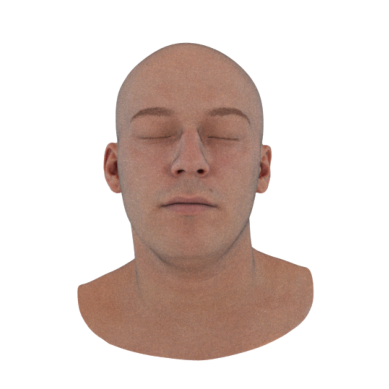

In [22]:
scene = mi.load_file("../scenes/marcus.xml")
image = mi.render(scene, spp=128)

plt.axis("off")
plt.imshow(image ** (1.0 / 2.2))
plt.show()

In [10]:
params = mi.traverse(scene)
print(params)


positions = np.array(params["head.vertex_positions"]).reshape(-1, 3)
print(positions)
print(positions.max(0))
print(positions.min(0))

SceneParameters[
  -------------------------------------------------------------------------------------------
  Name                                    Flags    Type              Parent
  -------------------------------------------------------------------------------------------
  sensor.near_clip                                 float             PerspectiveCamera
  sensor.far_clip                                  float             PerspectiveCamera
  sensor.shutter_open                              float             PerspectiveCamera
  sensor.shutter_open_time                         float             PerspectiveCamera
  sensor.film.size                                 ScalarVector2u    HDRFilm
  sensor.film.crop_size                            ScalarVector2u    HDRFilm
  sensor.film.crop_offset                          ScalarPoint2u     HDRFilm
  sensor.x_fov                            ∂, D     Float             PerspectiveCamera
  sensor.principal_point_offset_x         ∂, D     Fl